### References:
#### Documentations:
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#### Blogs:
    https://analyticsindiamag.com/beginners-guide-to-understanding-roc-curve-how-to-find-the-perfect-probability-threshold/
    https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
    https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python (Find optimum threshold)
#### Videos:
    https://www.youtube.com/watch?v=OAl6eAyP-yo
    https://www.youtube.com/watch?v=A_ZKMsZ3f3o
    https://www.youtube.com/watch?v=2ru56OLpBOQ (try manually different thresholds)
**Also Refer: pro_01_sklearn.ipynb**

## Need for ROC_AUC:
    Logistic Regressor uses probability to distribute samples into classes and in most cases the probability threshold defaults to 0.5. 
    Which means that the algorithm classifies a sample as positive if the probability of that sample being positive is above 0.5(50%) and classifies a sample as negative if the probability of that sample being negativw is less 0.5(50%) .
    The classification of critical data demands a more custom threshold which meets certain requirements.
**The ROC curve visualises the effect of a chosen probability threshold on the classification efficiency. It helps analyse how the efficiency of Classification changes with the values of Probability threshold.**

## Way to determine efficiency
### The Confusion Matrix
The simplest way to analyse classification efficiency is by creating a Confusion Matrix with the predicted outcomes. The Confusion Matrix is also known as the Error Matrix as it determines the error rate in a classification prediction.
### Inference:
**True Positive (TP)** <br>
    The predicted value matches the actual value<br>
    The actual value was positive and the model predicted a positive value<br>
**True Negative (TN)**<br>
    The predicted value matches the actual value<br>
    The actual value was negative and the model predicted a negative value<br>
**False Positive (FP) – Type 1 error**<br>
    The predicted value was falsely predicted<br>
    The actual value was negative but the model predicted a positive value<br>
**False Negative (FN) – Type 2 error**<br>
    The predicted value was falsely predicted<br>
    The actual value was positive but the model predicted a negative value<br>
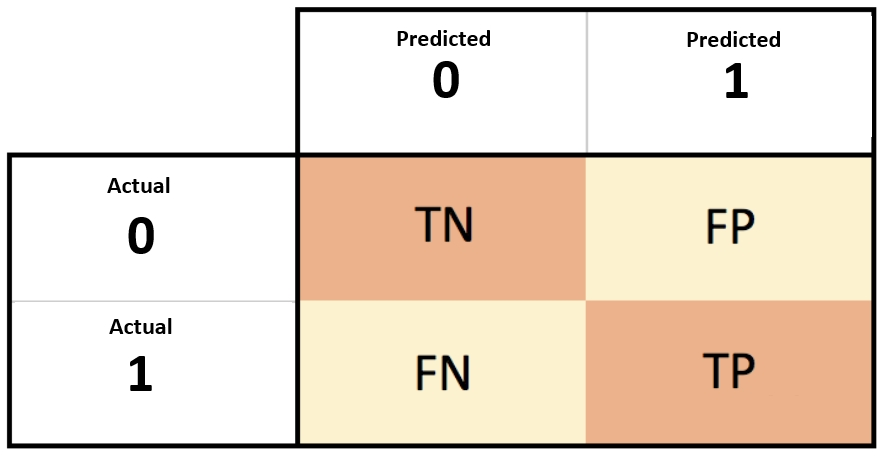

## Metrics:
**Precision:**<br>
Precision tells us how many of the correctly predicted cases actually turned out to be positive.<br>
ie., When the model predicted yes, how often is it correct?<br>
**Recall:**<br>
Recall tells us how many of the actual positive cases we were able to predict correctly with our model. <br>
ie., Whwn it is actually yes, how often it predicted yes?<br>
**F1-Score**<br>
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score <br>captures both the trends in a single value.<br>

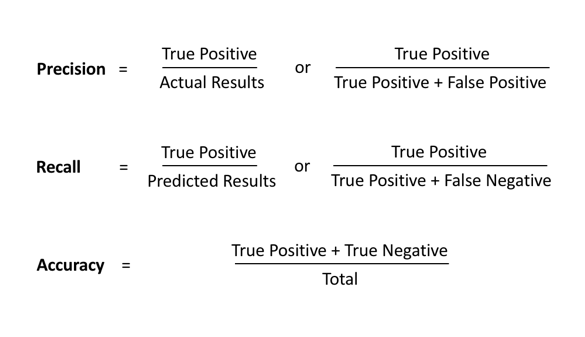

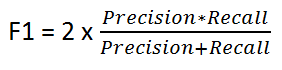

## ROC_AUC:
**ROC - Receiver Operating Characteristic Curve**<br>
**AUC - Area Under the Curve** <br>
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.<br>
**True Positive Rate**<br>
True Positive Rate(TPR) also called as sensitivity, recall and hit rate is the ratio of Positive samples which were correctly classified.<br>
**False Positive Rate**<br>
False Positive Rate (FPR) also called fall out is the ratio of negative samples which are incorrectly classified. 
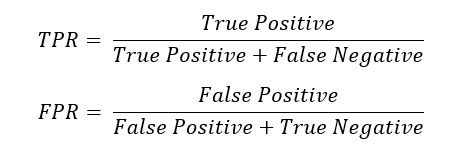
**TPR = 1, FPR = 0 -- Best model**

## ROC_AUC Curve
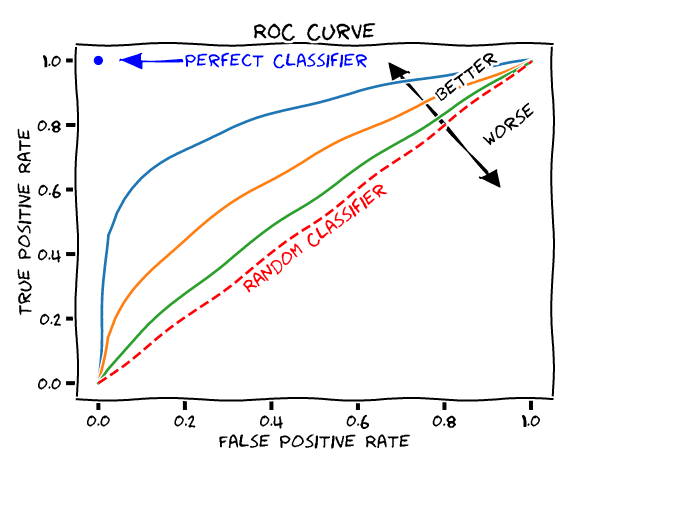
#### From the figure,
    (i) The red line indicates the points where the TPR and FPR are equal and any point on the line suggests that the ratio of correctly classified Positives is the same as the ratio of incorrectly classified Negatives which is only as good as a random classifier. (WORST MODEL)
    (ii) Any point above the red line is better than a random classifier. 
    (iii)Any point to the left of the red line indicates that the ratio of true positives are greater than that of false positives indicating a better probability threshold as the point moves towards left.
    (iv)The blue, orange and green lines represent ROC curves. Since the blue line is further away from the random classifier, it represents a better classifier in terms of efficiency.
    (v)The blue dot represents a perfect classifier. At coordinate (0,1) the FPR is 0 and TPR is 1, meaning that all the positives are correctly classified and no negatives are incorrectly classified. Simply this means that there are no incorrect predictions at all.
### AUC Score
**AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.**<br>
ie., The optimal cut off would be where tpr is high and fpr is low.<br>
tpr - (1-fpr) is zero or near to zero is the optimal cut off point.

# Example

### Loading Data

In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("Datasets/06_diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Selectiong Feature

In [2]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [3]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Model Development

In [4]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Prediction
y_pred=logreg.predict(X_test)

#predict_proba
y_pred_probability = logreg.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation

In [5]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [6]:
# Visualization
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

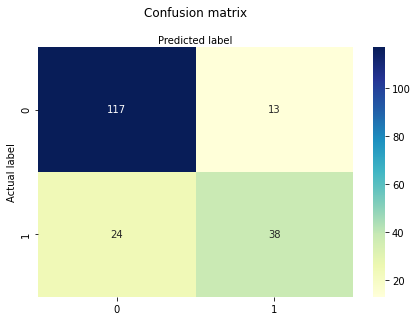

In [7]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
# Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


## ROC Curve

### Syntax:
**y_pred_probability** -- consists of 2 columns. <br>
ie., column 0 - probability of output class 0; column 1 - probability of output class 1 <br>

**roc_curve** -- roc_curve(y_true, y_score) <br>
**Inputs**<br>
y_true - actual outputs<br>
y_score - y_pred_probability[:,1] - column1 of y_pred_probability - bcoz,if column1 > 0.5 - True, column1 < 0.5 - False<br>
**Outputs**<br>
fpr, tpr, thresholds<br>

**roc_auc_score** -- roc_curve(y_true, y_score) <br>
**Inputs**<br>
y_true - actual outputs<br>
y_score - y_pred_probability[:,1] - column1 of y_pred_probability - bcoz,if column1 > 0.5 - True, column1 < 0.5 - False<br>
**Outputs**<br>
area under the curve <br>
#### Note:
if **multi-class** prediction, for **roc_auc_score** -- roc_curve(y_true, y_score, multi_class='ovr')<br>
**Inputs**<br>
y_true - actual outputs<br>
y_score - entire y_pred_probability<br>
multi_class='ovr' - Stands for One-vs-rest. Computes the AUC of each class against the rest<br>
**Outputs**<br>
area under the curve <br>

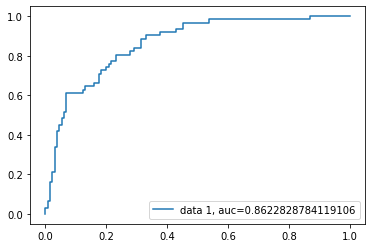

In [9]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# (or) auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Using different Thersholds

In [10]:
#actual ytest outputs
y_test[:5]

661    1
122    0
113    0
14     1
529    0
Name: label, dtype: int64

In [11]:
#predicted
y_pred[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [12]:
logreg.predict_proba(X_test)[:5,:]

array([[0.04919631, 0.95080369],
       [0.83865685, 0.16134315],
       [0.89274453, 0.10725547],
       [0.37371222, 0.62628778],
       [0.87265026, 0.12734974]])

In [13]:
# with default threshold = 0.5
y_pred_th = np.where(logreg.predict_proba(X_test)[:,1]>0.5,1,0) 
y_pred_th[:5]

array([1, 0, 0, 1, 0])

In [14]:
# find optimum threshold
ran = np.arange(0,1.1,0.1)
for thresh in ran:
    y_pred_th = np.where(logreg.predict_proba(X_test)[:,1]>thresh,1,0)
    print('Threshold: ',thresh)
    print(metrics.confusion_matrix(y_test,y_pred_th))
    print('ROC AUC Score:',metrics.roc_auc_score(y_test,y_pred_th))
    print()

Threshold:  0.0
[[  0 130]
 [  0  62]]
ROC AUC Score: 0.5

Threshold:  0.1
[[36 94]
 [ 1 61]]
ROC AUC Score: 0.6303970223325062

Threshold:  0.2
[[74 56]
 [ 4 58]]
ROC AUC Score: 0.7523573200992556

Threshold:  0.30000000000000004
[[93 37]
 [11 51]]
ROC AUC Score: 0.7689826302729529

Threshold:  0.4
[[107  23]
 [ 21  41]]
ROC AUC Score: 0.742183622828784

Threshold:  0.5
[[117  13]
 [ 24  38]]
ROC AUC Score: 0.7564516129032258

Threshold:  0.6000000000000001
[[122   8]
 [ 30  32]]
ROC AUC Score: 0.7272952853598015

Threshold:  0.7000000000000001
[[126   4]
 [ 41  21]]
ROC AUC Score: 0.6539702233250619

Threshold:  0.8
[[127   3]
 [ 51  11]]
ROC AUC Score: 0.5771712158808933

Threshold:  0.9
[[128   2]
 [ 58   4]]
ROC AUC Score: 0.5245657568238213

Threshold:  1.0
[[130   0]
 [ 62   0]]
ROC AUC Score: 0.5

